# Table of Content

1. OECD API data extraction for the dataset: gender wage-gap
2. Gender wage-gap analysis per country
3. Correlation between Gender wage-gad and GDP

<br>
<br>

## OECD API data extraction for the dataset: gender wage-gap

In [3]:
# OECD API data extraction for the dataset: gender wage-gap

import requests
import xml.etree.ElementTree as ET # Library for parsing the XML data we get from the OECD API
import pandas as pd

# API URL with filters applied (countries selected)
url = "https://sdmx.oecd.org/public/rest/data/OECD.ELS.SAE,DSD_EARNINGS@GENDER_WAGE_GAP,1.0/NOR+NZL+BRA+COL+JPN+GRC+DEU+FRA+USA......_T?startPeriod=2005&endPeriod=2023&dimensionAtObservation=AllDimensions"

# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Data retrieved successfully!")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Data retrieved successfully!


In [11]:
# Parse the XML content
root = ET.fromstring(response.content)

# Define the namespace to use with XML parsing
ns = {
    'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic',
    'message': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message'
}

In [9]:
# Find the DataSet element
# The DataSet element contains the actual data we need. We’ll find it using the appropriate namespace.
dataset = root.find('.//message:DataSet', ns)

In [13]:
# List to hold the extracted data
data = []

# Iterate over each Obs element in the DataSet
for obs in dataset.findall('generic:Obs', ns):
    obs_data = {}

    # Extract TIME_PERIOD, REF_AREA, GENDER from the ObsKey
    for value in obs.find('generic:ObsKey', ns):
        obs_data[value.attrib['id']] = value.attrib['value']

    # Extract the observation value
    obs_value = obs.find('generic:ObsValue', ns)
    if obs_value is not None:
        obs_data['OBS_VALUE'] = obs_value.attrib['value']
    else:
        print("ObsValue not found for an observation.")
        continue

    # Append the data
    data.append(obs_data)

ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.
ObsValue not found for an observation.


In [15]:
# Check if data is being extracted
print(f"Number of records extracted: {len(data)}")
if len(data) > 0:
    print("Sample data:", data[:5])

    # Convert the list of dictionaries into a pandas DataFrame
    df = pd.DataFrame(data)

    # Display the first few rows of the DataFrame to check the data
    display(df.head())
else:
    print("No data extracted to save.")

Number of records extracted: 401
Sample data: [{'TIME_PERIOD': '2013', 'REF_AREA': 'NZL', 'MEASURE': 'GWP', 'UNIT_MEASURE': 'PT_WG_SAL_M_D', 'PAY_PERIOD': '_Z', 'PRICE_BASE': '_Z', 'AGGREGATION_OPERATION': 'D1', 'SEX': '_T', 'OBS_VALUE': '2.4064171123'}, {'TIME_PERIOD': '2015', 'REF_AREA': 'COL', 'MEASURE': 'GWP', 'UNIT_MEASURE': 'PT_WG_SAL_M_D', 'PAY_PERIOD': '_Z', 'PRICE_BASE': '_Z', 'AGGREGATION_OPERATION': 'MEDIAN', 'SEX': '_T', 'OBS_VALUE': '14.245359161'}, {'TIME_PERIOD': '2013', 'REF_AREA': 'NOR', 'MEASURE': 'GWP', 'UNIT_MEASURE': 'PT_WG_SAL_M_D', 'PAY_PERIOD': '_Z', 'PRICE_BASE': '_Z', 'AGGREGATION_OPERATION': 'D1', 'SEX': '_T', 'OBS_VALUE': '3.4420289855'}, {'TIME_PERIOD': '2006', 'REF_AREA': 'NOR', 'MEASURE': 'GWP', 'UNIT_MEASURE': 'PT_WG_SAL_M_D', 'PAY_PERIOD': '_Z', 'PRICE_BASE': '_Z', 'AGGREGATION_OPERATION': 'D9', 'SEX': '_T', 'OBS_VALUE': '22.122265385'}, {'TIME_PERIOD': '2007', 'REF_AREA': 'NOR', 'MEASURE': 'GWP', 'UNIT_MEASURE': 'PT_WG_SAL_M_D', 'PAY_PERIOD': '_Z', 'PR

,TIME_PERIOD,REF_AREA,MEASURE,UNIT_MEASURE,PAY_PERIOD,PRICE_BASE,AGGREGATION_OPERATION,SEX,OBS_VALUE
0,2013,NZL,GWP,PT_WG_SAL_M_D,_Z,_Z,D1,_T,2.4064171123
1,2015,COL,GWP,PT_WG_SAL_M_D,_Z,_Z,MEDIAN,_T,14.245359161
2,2013,NOR,GWP,PT_WG_SAL_M_D,_Z,_Z,D1,_T,3.4420289855
3,2006,NOR,GWP,PT_WG_SAL_M_D,_Z,_Z,D9,_T,22.122265385
4,2007,NOR,GWP,PT_WG_SAL_M_D,_Z,_Z,D9,_T,21.947004608


In [17]:
# Save the DataFrame to a CSV file in the specified folder
df.to_csv('/Users/angela.garay/Ironhack/Week-3/Project/data/raw/gender_wage_gap_data.csv', index=False)

# Confirmation message
print("Data saved to '/Users/angela.garay/Ironhack/Week-3/Project/data/raw/gender_wage_gap_data.csv'")

Data saved to '/Users/angela.garay/Ironhack/Week-3/Project/data/raw/gender_wage_gap_data.csv'


<br>
<br>

## Gender wage-gap analysis per country

In [19]:
import matplotlib.pyplot as plt

# Load the data from the folder
gender_wage_gap_df = pd.read_csv('/Users/angela.garay/Ironhack/Week-3/Project/data/raw/gender_wage_gap_data.csv')

gender_wage_gap_df.head(5)

,TIME_PERIOD,REF_AREA,MEASURE,UNIT_MEASURE,PAY_PERIOD,PRICE_BASE,AGGREGATION_OPERATION,SEX,OBS_VALUE
0,2013,NZL,GWP,PT_WG_SAL_M_D,_Z,_Z,D1,_T,2.406417
1,2015,COL,GWP,PT_WG_SAL_M_D,_Z,_Z,MEDIAN,_T,14.245359
2,2013,NOR,GWP,PT_WG_SAL_M_D,_Z,_Z,D1,_T,3.442029
3,2006,NOR,GWP,PT_WG_SAL_M_D,_Z,_Z,D9,_T,22.122265
4,2007,NOR,GWP,PT_WG_SAL_M_D,_Z,_Z,D9,_T,21.947005


In [102]:
# Filter the data for each country
country = 'NOR' # Here you can select the country you want to check

country_selected_df = gender_wage_gap_df[gender_wage_gap_df['REF_AREA'] == country]
country_selected_df.head(5)

# Pivot the DataFrame to have aggregation operation as the index and years as columns
country_selected_pivot = country_selected_df.pivot(
    index='AGGREGATION_OPERATION', 
    columns='TIME_PERIOD', 
    values='OBS_VALUE'
)
display(country_selected_pivot)

TIME_PERIOD,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AGGREGATION_OPERATION,,,,,,,,,,,,,,,,,,,
D1,4.272684,4.261232,4.190816,4.804046,3.906250,3.957262,3.846154,2.776735,3.442029,2.971348,2.309307,5.412813,5.153949,3.717105,4.106128,3.817734,3.817698,3.543307,2.260037
D9,21.989642,22.122265,21.947005,22.290685,22.802768,22.183333,21.378318,20.717933,20.507494,20.017331,21.853293,20.282041,19.368450,18.521463,18.306986,18.087500,17.404873,17.118663,16.681156
MEDIAN,8.624376,8.210742,8.789440,8.757576,8.284371,7.236095,7.144812,5.792118,6.597045,5.800694,6.957774,6.306306,5.494761,5.129369,4.367867,4.813864,4.601479,4.481459,4.520089


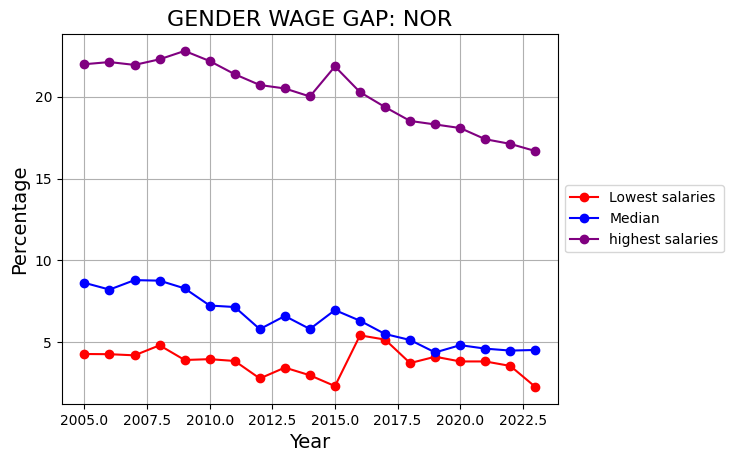

In [106]:
# Plot each 'AGGREGATION_OPERATION'(D1, MEDIAN, D9) over the years:

plt.plot(country_selected_pivot.columns, country_selected_pivot.loc['D1'], marker='o', color='red', label='Lowest salaries')
plt.plot(country_selected_pivot.columns, country_selected_pivot.loc['MEDIAN'], marker='o', color='blue', label='Median')
plt.plot(country_selected_pivot.columns, country_selected_pivot.loc['D9'], marker='o', color='purple', label='highest salaries')


# Customize the plot to match the style of the example
plt.title(f'GENDER WAGE GAP: {country}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.grid(True)

# Position the labels in the top-right corner
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

<br>
<br>

## Correlation between Gender wage-gad and GDP

In [25]:
gender_wage_gap_df['REF_AREA'].unique()

array(['NZL', 'COL', 'NOR', 'GRC', 'JPN', 'DEU', 'USA', 'FRA', 'BRA'],
      dtype=object)

In [27]:
gender_wage_gap_df['AGGREGATION_OPERATION'].unique()

array(['D1', 'MEDIAN', 'D9'], dtype=object)

In [29]:
# Cleaning the dataframe:
gender_wage_gap_df = gender_wage_gap_df.drop(columns=['UNIT_MEASURE', 'PAY_PERIOD', 'PRICE_BASE', 'SEX'])

In [31]:
gender_wage_gap_df.head()

,TIME_PERIOD,REF_AREA,MEASURE,AGGREGATION_OPERATION,OBS_VALUE
0,2013,NZL,GWP,D1,2.406417
1,2015,COL,GWP,MEDIAN,14.245359
2,2013,NOR,GWP,D1,3.442029
3,2006,NOR,GWP,D9,22.122265
4,2007,NOR,GWP,D9,21.947005


In [33]:
# Create dataframe for the 2021 GDP data

# Mapping from country names to ISO 3-letter country codes
country_mapping = {
    'Norway': 'NOR',
    'Greece': 'GRC',
    'France': 'FRA',
    'Germany': 'DEU',
    'United States': 'USA',
    'Brazil': 'BRA',
    'Colombia': 'COL',
    'Japan': 'JPN',
    'New Zealand': 'NZL',
    'Pakistan': 'PAK',
    'Ghana': 'GHA',
    'Cameroon': 'CMR'
}

# GDP per capita data for 2021
gdp_per_capita_2021 = {
    'Country': ['NOR', 'GRC', 'FRA', 'DEU', 'USA', 'BRA', 'COL', 'JPN', 'NZL'],
    'GDP_per_Capita_2021': [36.5, 11.07, 18.7, 21.25, 30.58, 3.03, 3.05, 17.19, 26.29]
}

# Create the DataFrame
gdp_2021_df = pd.DataFrame(gdp_per_capita_2021)

display(gdp_2021_df)

,Country,GDP_per_Capita_2021
0,NOR,36.50
1,GRC,11.07
2,FRA,18.70
3,DEU,21.25
4,USA,30.58
5,BRA,3.03
6,COL,3.05
7,JPN,17.19
8,NZL,26.29


In [35]:
# Filter gender_wage_gap_df for the year 2021 and selected countries

countries_of_interest = ['NOR', 'GRC', 'FRA', 'DEU', 'USA', 'BRA', 'COL', 'JPN', 'NZL']

wage_gap_2021 = gender_wage_gap_df[
    (gender_wage_gap_df['TIME_PERIOD'] == 2021) & 
    (gender_wage_gap_df['REF_AREA'].isin(countries_of_interest))
]

# Display the filtered DataFrame to check
display(wage_gap_2021.head())

,TIME_PERIOD,REF_AREA,MEASURE,AGGREGATION_OPERATION,OBS_VALUE
33,2021,DEU,GWP,D9,20.766055
60,2021,DEU,GWP,D1,16.727538
80,2021,USA,GWP,MEDIAN,16.864175
96,2021,FRA,GWP,D9,24.952671
103,2021,FRA,GWP,D1,11.793447


In [37]:
# Pivot the dataframe to have AGGREGATION_OPERATION as columns
wage_gap_pivot_2021 = wage_gap_2021.pivot(
    index='REF_AREA', 
    columns='AGGREGATION_OPERATION', 
    values='OBS_VALUE'
)

# Display the pivoted DataFrame to ensure it's correct
display(wage_gap_pivot_2021.head())

AGGREGATION_OPERATION,D1,D9,MEDIAN
REF_AREA,,,
BRA,0.000000,4.000000,9.090909
COL,30.555556,NaN,3.340507
DEU,16.727538,20.766055,13.475054
FRA,11.793447,24.952671,11.558211
GRC,NaN,26.771599,8.143521


In [39]:
# Merge the pivoted DataFrame with the GDP DataFrame
merged_2021_df = pd.merge(wage_gap_pivot_2021, gdp_2021_df, left_on='REF_AREA', right_on='Country')

# Display the merged DataFrame to ensure it's correct
display(merged_2021_df)

,D1,D9,MEDIAN,Country,GDP_per_Capita_2021
0,0.000000,4.000000,9.090909,BRA,3.03
1,30.555556,NaN,3.340507,COL,3.05
2,16.727538,20.766055,13.475054,DEU,21.25
3,11.793447,24.952671,11.558211,FRA,18.70
4,NaN,26.771599,8.143521,GRC,11.07
5,15.691352,30.588908,22.113766,JPN,17.19
6,3.817698,17.404873,4.601479,NOR,36.50
7,0.000000,16.666667,6.666667,NZL,26.29
8,9.398496,22.423347,16.864175,USA,30.58


In [41]:
# Calculate correlations
correlation_d1 = merged_2021_df['D1'].corr(merged_2021_df['GDP_per_Capita_2021'])
correlation_d9 = merged_2021_df['D9'].corr(merged_2021_df['GDP_per_Capita_2021'])
correlation_median = merged_2021_df['MEDIAN'].corr(merged_2021_df['GDP_per_Capita_2021'])

# Print the correlation results
print(f"Correlation between D1 and GDP per Capita: {correlation_d1}")
print(f"Correlation between D9 and GDP per Capita: {correlation_d9}")
print(f"Correlation between Median and GDP per Capita: {correlation_median}")

Correlation between D1 and GDP per Capita: -0.4143053351665722
Correlation between D9 and GDP per Capita: 0.22325090610484147
Correlation between Median and GDP per Capita: 0.14929077341072636


In [85]:
# Create a scatterplot to see better the correlation

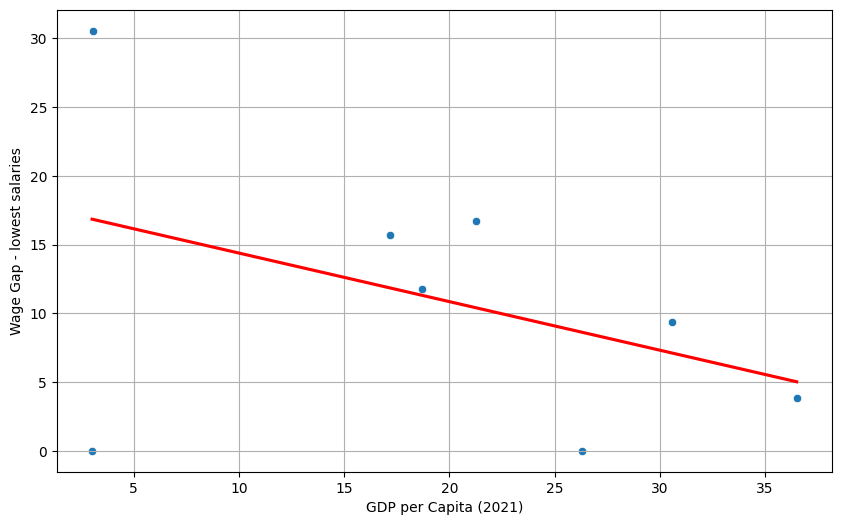

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_Capita_2021', y='D1', data=merged_2021_df)

# Optionally add a regression line
sns.regplot(x='GDP_per_Capita_2021', y='D1', data=merged_2021_df, scatter=False, color='red', ci=None)

# Add labels and title
#plt.title('Correlation between GDP per Capita (2021) and Wage Gap (D1)')
plt.xlabel('GDP per Capita (2021)')
plt.ylabel('Wage Gap - lowest salaries')

# Display the plot
plt.grid(True)
plt.show()

In [49]:
# Let's try with 2022 year
# Create dataframe for the 2022 GDP data

# GDP per capita data for 2022
gdp_per_capita_2022 = {
    'Country': ['NOR', 'GRC', 'FRA', 'DEU', 'USA', 'BRA', 'COL', 'JPN', 'NZL'],
    'GDP_per_Capita_2022': [89.154, 22.328, 44.079, 51.203, 76.398, 8.783, 7.095, 33.815, 52.155]
}

# Create the DataFrame
gdp_2022_df = pd.DataFrame(gdp_per_capita_2022)

display(gdp_2022_df)

,Country,GDP_per_Capita_2022
0,NOR,89.154
1,GRC,22.328
2,FRA,44.079
3,DEU,51.203
4,USA,76.398
5,BRA,8.783
6,COL,7.095
7,JPN,33.815
8,NZL,52.155


In [53]:
# Filter gender_wage_gap_df for the year 2023 and selected countries

wage_gap_2022 = gender_wage_gap_df[
    (gender_wage_gap_df['TIME_PERIOD'] == 2022) & 
    (gender_wage_gap_df['REF_AREA'].isin(countries_of_interest))
]

# Display the filtered DataFrame to check
display(wage_gap_2022)

,TIME_PERIOD,REF_AREA,MEASURE,AGGREGATION_OPERATION,OBS_VALUE
6,2022,GRC,GWP,D9,28.594920
34,2022,DEU,GWP,D9,18.704014
61,2022,DEU,GWP,D1,20.419065
81,2022,USA,GWP,MEDIAN,16.984402
97,2022,FRA,GWP,D9,20.392236
104,2022,FRA,GWP,D1,8.407545
110,2022,NOR,GWP,D9,17.118663
121,2022,USA,GWP,D9,23.217993
137,2022,GRC,GWP,MEDIAN,8.084190
146,2022,NZL,GWP,MEDIAN,6.255865


In [55]:
# Pivot the dataframe to have AGGREGATION_OPERATION as columns
wage_gap_pivot_2022 = wage_gap_2022.pivot(
    index='REF_AREA', 
    columns='AGGREGATION_OPERATION', 
    values='OBS_VALUE'
)

# Display the pivoted DataFrame to ensure it's correct
display(wage_gap_pivot_2022)

AGGREGATION_OPERATION,D1,D9,MEDIAN
REF_AREA,,,
BRA,NaN,0.000000,11.111111
COL,14.285714,NaN,1.858736
DEU,20.419065,18.704014,14.380132
FRA,8.407545,20.392236,11.558211
GRC,NaN,28.594920,8.084190
JPN,15.173116,30.281426,21.347942
NOR,3.543307,17.118663,4.481459
NZL,2.395741,15.812954,6.255865
USA,12.776831,23.217993,16.984402


In [74]:
# Merge the pivoted DataFrame with the GDP DataFrame
merged_2022_df = pd.merge(wage_gap_pivot_2022, gdp_2022_df, left_on='REF_AREA', right_on='Country')

# Display the merged DataFrame to ensure it's correct
display(merged_2022_df.head())

,D1,D9,MEDIAN,Country,GDP_per_Capita_2022
0,NaN,0.000000,11.111111,BRA,8.783
1,14.285714,NaN,1.858736,COL,7.095
2,20.419065,18.704014,14.380132,DEU,51.203
3,8.407545,20.392236,11.558211,FRA,44.079
4,NaN,28.594920,8.084190,GRC,22.328


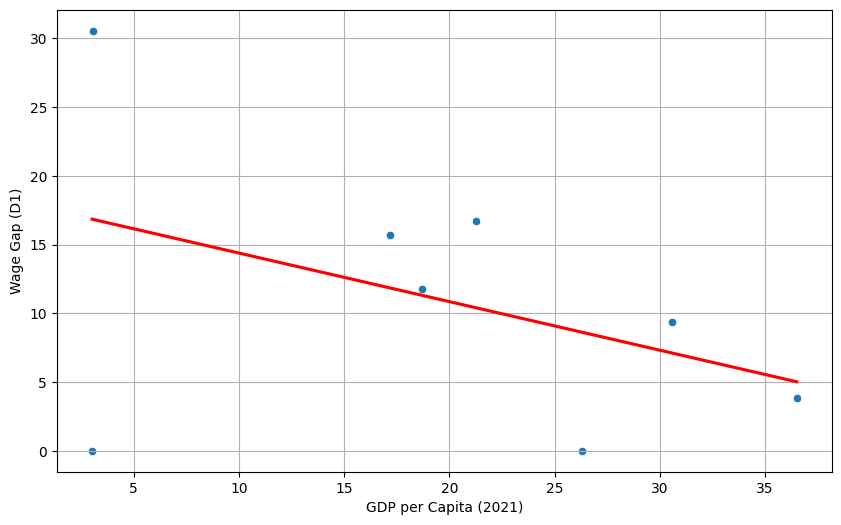

In [93]:
# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_Capita_2021', y='D1', data=merged_2021_df)

# Optionally add a regression line
sns.regplot(x='GDP_per_Capita_2021', y='D1', data=merged_2021_df, scatter=False, color='red', ci=None)

# Add labels and title
#plt.title('Correlation between GDP per Capita (2021) and Wage Gap (D1)')
plt.xlabel('GDP per Capita (2021)')
plt.ylabel('Wage Gap (D1)')

# Display the plot
plt.grid(True)
plt.show()